## Convolution Neural Networks: Application

Welcome to the Course 4's second assignment! In this notebook, you will:
* Create a mood classifier using the TF Keras Sequential API
* Build a convNet to identify sign language using the TF Keras Functional API

After this assignment, you will be able to:
* Build and train a ConvNet in TensorFlow for a binary classification problem
* Build and train a ConvNet in TensorFlow for a multi-class classification problem
* Explain different use cases for the Sequential and Functional APIs in TensorFlow Keras

To complete this assignment, you should already be familiar with TensorFlow. If you are not, please refer back to the **TensorFlow Tutorial** of the third week of Course 2 ("**Improving deep neural networks**").


In [1]:
import os

In [2]:
os.getcwd()

'/workspace'

In [3]:
os.chdir(os.path.join(os.getcwd(), 'Chapter04-Convolutional-Neural-Networks/W1A2'))

In [4]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import  tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)


## 1.1 Load the data and split Data into Train/Test sets
You will be using the Happy House Dataset for this part of the assignment, which contains people's face. Your task will be to build a ConvNet that determines whether the peope in the images are smiling or not -- because they only get to enter house if they are smiling!



In [5]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

### Normalize image vectors
X_train = X_train_orig/255.0
X_test = X_test_orig/255.0

## Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))    
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


You can display the images contained in the dataset. Images are 64x64 pixels in RGB format with 3 channels.

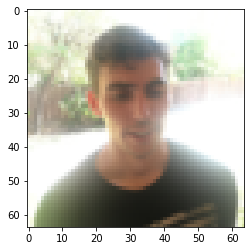

In [6]:
index = 121
plt.imshow(X_train_orig[index])
plt.show()

### 2 - Layers in TF Keras
In the previous assignment, you created layers manually in numpy. In TF.Keras, you don't have to write code directly to create layers. Rather, TF Keras has pre-defined layers you can use. 

When you create a layer in TF Keras, you are creating a function that takes some input and transforms it into an output you can reuse later. Nice and easy!



### 3 - The Sequential API
In the previous assignment, you built helper functions using numpy to understand the mechanics behind the convolutional neural networks. Most practical applications of deep learning today are built using programming frameworks, which have many built-in functions you can simply call. Keras is a high-level abstraction built on top of TensorFlow, which allows for even more simplified and optimized model creation and trainning. 

For the first part of this assignment, you will create a model using TF Keras' Sequential API, which allows you to build layer by layer, and is ideal for building models where each layer has exactly one input tensor and one output tensor. 

As you'll see, using the sequential API is simple and straightforward, but is only appropriate for simpler, more straightforward tasks. Later in this notebook, you'll spend some time building with a more flexible, powerful alternative: the Functional API.


### 3.1 - Create the Sequential Model

As mentioned earlier, The TensorFlow Keras Sequential API can be used to build simple models with layer operations that proceeded in a sequential order.

You can also add layers incrementally to a Sequential model using the `add()` method, or remove them using the `pop()` method, much like you would in a regular Python list.

Actually, you can think of a Sequential model as behaving like a Python list of layers! Like python lists, Sequential layers are ordered, and the order in which you add layers matters. if your model is non-linear or contains layers with multiple inputs or outputs, a Sequential model is not appropriate, and you should use the Functional API instead (which you'll do later in this assignment).

For any layer construction in TF Keras, you'll need to specify the input shape in advance. This is because in TF Keras, the shape of the weights is based on the shape of the input. the weight are only created when the model first see some input data. Sequential models can be created by passing a list of layers to the Sequential constructor. 



**Exercise 1-happyModel**

Implement the happyModel  function below to build the following model: ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE

Also, plug in the following parameters for all the steps:
- ZEROPAD2D padding = (3,3), input shape = (64,64,3)
- CONV2D: Use 32 filters, kernel size = (7,7), strides = (1,1), 'valid' padding
- BATCHNORM: for axis = 3
- RELU: no parameters
- MAXPOOL: default parameters
- FLATTEN: no parameters
- Fully-connected DENSE layer: Apply a fully connected layer with 1 neuron and a sigmoid activation function.

**Hint**

Use tfl to refer to tensorflow.keras.layers

In [7]:
## GRADE FUNCTION: HappyModel

def happyModel():
    """
    Implements the forward propagation for the binary classification model.
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL2D -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes.
    Normally, functions should take these values as function parameters.

    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    
    """
    model = tf.keras.Sequential([
        # ZEROPAD2D with padding 3, input shape of (64, 64, 3)
        ## This layer can add rows and columns of at the top, bottom, left and right side of an image tensor. 
        tfl.ZeroPadding2D(padding=3, input_shape=(64, 64, 3)),

        # Conv2D with 32 filters of shape 7x7, stride of 1
        tfl.Conv2D(filters=32, kernel_size=(7,7), strides=(1,1), padding='valid'),

        # BatchNormalization on the channels axis
        ## Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
        ## axis, Integer, the axis that should be normalized (typically the features axis). For instance, after a Conv2D layer with data_format="channels_first", set axis=1 in BatchNormalization.
        tfl.BatchNormalization(axis=3),

        # ReLU
        tfl.ReLU(),
        # MaxPool2D with a 2x2 window and stride of 2
        tfl.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
        
        # Flatten layer
        tfl.Flatten(),

        # Dense layer with 1 unit for output & sigmoid activation
        tfl.Dense(units=1, activation='sigmoid')

    ])

    return model



In [8]:
happy_model = happyModel()
# Print a summary for each layer
for layer in summary(happy_model):
    print(layer)
    
output = [['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))],
            ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
            ['BatchNormalization', (None, 64, 64, 32), 128],
            ['ReLU', (None, 64, 64, 32), 0],
            ['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid'],
            ['Flatten', (None, 32768), 0],
            ['Dense', (None, 1), 32769, 'sigmoid']]
    
comparator(summary(happy_model), output)

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']
All tests passed!


Now that your model is created, you can compile it for training with an optimizer and loss of your choice. When the string 'accuracy' is specified as a metric, the type of accuracy used will be automatically converted based on the loss function used. 

This is one of the many optimizations built into tensorflow that make your life easier! If you'd like to read more on how the compiler operates, check the docs [here](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile).

In [9]:
happy_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

It's time to check your model's parameters with the `.summary()` method. This will display the types of layers you have, the shape of the outputs, and how many parameters are in each layer. 

In [10]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

### Train and Evaluate the model

After creating the model, compiling it with your choice of optimizer and loss function, and doing a sanity check on its contents. you are now ready to build!!

Simply call the `.fit()` method to train your model. That's it! No need for mini-batching, saving, or complex backpropagation computation. That's all been done for you, as you're using a Tensorflow dataset with the batches specified already.  You do have the option to specify epoch number of minibatch size if you like.

In [11]:
happy_model.fit(x=X_train, y=Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 2s 50ms/step - loss: 1.9601 - accuracy: 0.6583
Epoch 2/10
38/38 [==============================] - 1s 38ms/step - loss: 0.6125 - accuracy: 0.8367
Epoch 3/10
38/38 [==============================] - 1s 39ms/step - loss: 0.1728 - accuracy: 0.9267
Epoch 4/10
38/38 [==============================] - 1s 36ms/step - loss: 0.1079 - accuracy: 0.9683
Epoch 5/10
38/38 [==============================] - 2s 49ms/step - loss: 0.0805 - accuracy: 0.9733
Epoch 6/10
38/38 [==============================] - 2s 45ms/step - loss: 0.0755 - accuracy: 0.9767
Epoch 7/10
38/38 [==============================] - 2s 44ms/step - loss: 0.1144 - accuracy: 0.9550
Epoch 8/10
38/38 [==============================] - 2s 47ms/step - loss: 0.0701 - accuracy: 0.9767
Epoch 9/10
38/38 [==============================] - 2s 41ms/step - loss: 0.0617 - accuracy: 0.9717
Epoch 10/10
38/38 [==============================] - 2s 45ms/step - loss: 0.0687 - accuracy: 0.9767


After that completes, just use .evaluate() to evaluate against your test set! The function will print the value of the loss function and the performance specified during the compilation of the model. in this case, the binary_crossentropy loss and accuracy respectively.

In [12]:
happy_model.evaluate(x=X_test, y=Y_test)

5/5 [==============================] - 0s 13ms/step - loss: 0.1535 - accuracy: 0.9533


[0.15349826216697693, 0.95333331823349]

Easy, right? But what if you need to build a model with shared layers, branches, or multiple inputs or outputs? This is where Sequential, with its beautifully simple yet limited functionality, won't be able to help you. 

Next up, Enter the Functional API, your slightly more complex, highly flexible friend. 


### 4. The Functional API

Welcome to the second half of the assignment, where you'll use Keras's flexible [Functional API](https://www.tensorflow.org/guide/keras/functional) to build a ConvNet that can differentiate between 6 sign language digits.

The Functional API can handle models with non-linear topology, shared layers, as well as layers with multiple inputs or outputs.  Imagine that, where the Sequential API requires the model to move in a linear fashion through its layers, the Functional API allows much more flexibility. Where Sequential is a straight line, the Functional model is a graph. where the nodes of the layers can connect in many more ways than one.  

In the visual example below, the one possible direction of the movement Sequential model is shown in contrast to a skip connection, which is just one of the many ways a Functional model can be constructed. A skip connection, as you might have guessed, skips some layer in the network and feeds the output to a later layer in the network.  Don't worry, you'll be spending more time with skip connections very soon!


<img src="images/seq_vs_func.png" style="width:500px;height:350px;">

### 4.1 - Load the SIGNs Dataset

As a reminder, the SIGNs dataset is a collection of 6 signs representing number from 0 to 5. Each image is a 64x64 pixel RGB image, and the corresponding label is one of the six classes.

In [13]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes  = load_signs_dataset()

<img src="images/SIGNS.png" style="width:800px;height:300px;">

The next cell will show you an example of a labelled image in the dataset. Feel free to change the value of `index` below and re-run to see different examples. 

y = 1


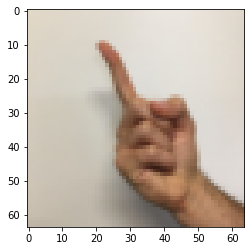

In [16]:
index = 11
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

### Split the Data into Train/Test sets

In Course 2, you built a fully-connected network for this dateset. But since this is an image dataset, it is more natural to apply a ConvNet to it. 

To get started, let's examine the shapes of your data. 

In [17]:
X_train_orig.shape

(1080, 64, 64, 3)

In [18]:
X_train = X_train_orig/255.
X_test_orig = X_test_orig/255.

Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

In [22]:
[Y_test_orig.reshape(-1)]

[array([0, 0, 0, 5, 1, 0, 3, 1, 5, 1, 5, 1, 3, 1, 1, 3, 5, 4, 0, 4, 5, 4,
        2, 5, 3, 5, 4, 2, 1, 2, 3, 1, 0, 3, 1, 1, 0, 4, 2, 3, 0, 3, 0, 2,
        3, 1, 2, 2, 0, 3, 4, 1, 2, 0, 4, 0, 4, 0, 4, 4, 5, 5, 2, 4, 4, 5,
        0, 1, 3, 5, 0, 4, 1, 2, 3, 4, 3, 5, 1, 5, 2, 0, 1, 4, 2, 4, 4, 1,
        4, 5, 5, 0, 0, 5, 5, 5, 3, 3, 5, 2, 2, 2, 0, 2, 5, 3, 0, 2, 3, 4,
        1, 3, 2, 4, 2, 2, 1, 3, 1, 3])]

In [26]:
np.eye(6)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [20]:
np.eye(6)[Y_test_orig.reshape(-1)]

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0.

## Take away 

####  BatchNormalization Axis示例说明： 

在例子中， 说明使用不同的axis参数时，BatchNormalization的行为是如何不同的。

**关键原因：方差（variance）的差异**
BatchNormalization的公式：
$$\hat{x} = \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}} \times \gamma + \beta$$
其中：
- $\mu$ 是均值
- $\sigma^2$ 是方差
- $\gamma, \beta$ 是可学习参数（初始时 $\gamma=1, \beta=0$）

即使原始数据在某个维度上的均值相同，但如果**方差不同**，经过 $\frac{1}{\sqrt{\sigma^2}}$ 缩放后，数据的分布就会不同，从而导致在其他维度上计算的均值也不同。

In [27]:
# 创建一个简单的数据示例来演示BatchNormalization在不同axis上的效果
# 设置随机种子以获得可重复的结果
tf.random.set_seed(42)
np.random.seed(42)

# 创建一个小的4D张量，模拟Conv2D的输出
# 形状: (batch_size=2, height=3, width=3, channels=2)
sample_data = np.array([
    [[[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]],
     [[7.0, 8.0], [9.0, 10.0], [11.0, 12.0]], 
     [[13.0, 14.0], [15.0, 16.0], [17.0, 18.0]]],
    
    [[[19.0, 20.0], [21.0, 22.0], [23.0, 24.0]],
     [[25.0, 26.0], [27.0, 28.0], [29.0, 30.0]],
     [[31.0, 32.0], [33.0, 34.0], [35.0, 36.0]]]
], dtype=np.float32)

print("原始数据形状:", sample_data.shape)
## param 0 表示第一个样本
## param 1 表示高度维度
## param 2 表示宽度维度
## param 3 表示通道维度

# Calculate statistics for each dimension
statistics_data = []

# Mean statistics for indices 0, 1, 2
for idx in [0, 1, 2]:
    row = {
        'index': idx,
        'height': np.mean(sample_data[:, idx, :, :]),
        'width': np.mean(sample_data[:, :, idx, :]),
        'channel': np.mean(sample_data[:, :, :, idx]) if idx < 2 else np.nan,
        'metric': 'mean'
    }
    statistics_data.append(row)

# Variance statistics for indices 0, 1, 2
for idx in [0, 1, 2]:
    row = {
        'index': idx,
        'height': np.var(sample_data[:, idx, :, :]),
        'width': np.var(sample_data[:, :, idx, :]),
        'channel': np.var(sample_data[:, :, :, idx]) if idx < 2 else np.nan,
        'metric': 'var'
    }
    statistics_data.append(row)

# Create combined DataFrame
stats_df = pd.DataFrame(statistics_data)

print("="*70)
print("Combined Statistics Table: Mean and Variance by Dimension")
print("="*70)
print(stats_df.to_string(index=False))

print("\n" + "="*70)
print("Global Statistics Summary")
print("="*70)
print(f"Height  - Global Mean: {np.mean(sample_data, axis=(0,2,3)).mean():.4f}, Global Var: {np.var(sample_data, axis=(0,2,3)).mean():.4f}")
print(f"Width   - Global Mean: {np.mean(sample_data, axis=(0,1,3)).mean():.4f}, Global Var: {np.var(sample_data, axis=(0,1,3)).mean():.4f}")
print(f"Channel - Global Mean: {np.mean(sample_data, axis=(0,1,2)).mean():.4f}, Global Var: {np.var(sample_data, axis=(0,1,2)).mean():.4f}")

原始数据形状: (2, 3, 3, 2)
Combined Statistics Table: Mean and Variance by Dimension
 index     height   width     channel metric
     0  12.500000   16.50   18.000000   mean
     1  18.500000   18.50   19.000000   mean
     2  24.500000   20.50         NaN   mean
     0  83.916664  105.25  107.666664    var
     1  83.916664  105.25  107.666664    var
     2  83.916664  105.25         NaN    var

Global Statistics Summary
Height  - Global Mean: 18.5000, Global Var: 83.9167
Width   - Global Mean: 18.5000, Global Var: 105.2500
Channel - Global Mean: 18.5000, Global Var: 107.6667


In [28]:
sample_data[1,:,:,0]

array([[19., 21., 23.],
       [25., 27., 29.],
       [31., 33., 35.]], dtype=float32)